In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn  #> 학습 위해 만들어 놓은 패키지

import warnings
warnings.filterwarnings("ignore")

from matplotlib import rc, font_manager, rcParams
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font", family=font_name)
rcParams["axes.unicode_minus"] = False

from sklearn.model_selection import train_test_split

# Decision Tree

    1) 설명하기 편함(단순하기 때문에 결과 신뢰성↓): 시각적 표현 효과↑
    
    2) Graphviz
        + http://www.graphviz.org
        + pip install graphviz
        
    3) 특징
        + 과적합 우려 : 가지치기로 해결(max_depth, max_leaf_nodes, min_samples_leaf)  
            #> leaf_nodes=자식 노드가 없는 단일 노드의 개수 설정
        
        + 모델을 쉽게 시각화(비교적 작은 트리일 때 쉽게 설명 가능)
        
        + 데이터 스케일이나 데이터 형식(이진 or 연속적인 특성)에 영향을 받지 않는다

In [2]:
#!pip install graphviz

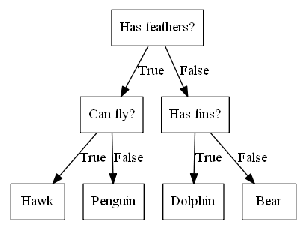

In [3]:
import os
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

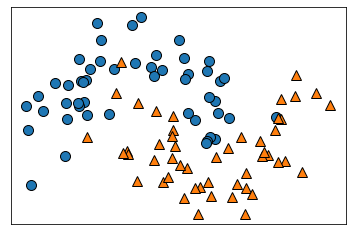

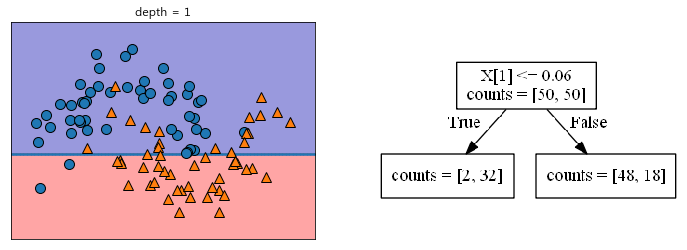

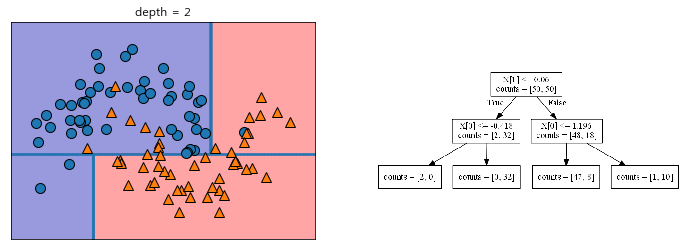

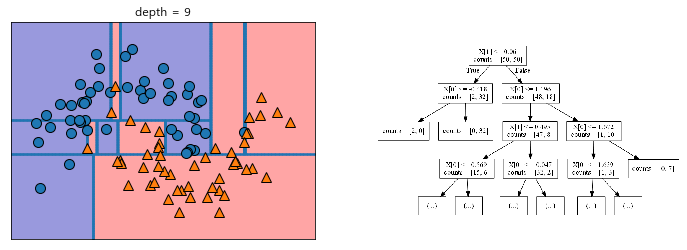

In [5]:
mglearn.plots.plot_tree_progressive()

### 복잡도 제어

1) 과적합 방지
    + 가지치기(prunning)
        - 사전 가지치기
        - 사후 가지치기(or 가지치기)
        - sklearn에서는 사전 가지치기만 제공

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [64]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)

In [65]:
tree.fit(X_train, y_train)

print("훈련 정확도: ", tree.score(X_train, y_train))  #> 과적합 우려
print("테스트 정확도: ", tree.score(X_test, y_test))

훈련 정확도:  1.0
테스트 정확도:  0.9370629370629371


In [39]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)  #> max_depth=최대 가지 개수 설정
tree.fit(X_train, y_train)

print("훈련 정확도: ", tree.score(X_train, y_train)) 
print("테스트 정확도: ", tree.score(X_test, y_test))

훈련 정확도:  0.9882629107981221
테스트 정확도:  0.951048951048951


In [11]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="data/tree.dot", class_names=["악성", "양성"], feature_names=cancer.feature_names, 
               impurity=False, filled=True)  
    #> graphviz로 불러오기 위해 이미지 .dot로 저장(.png로 저장시 파일 깨짐)

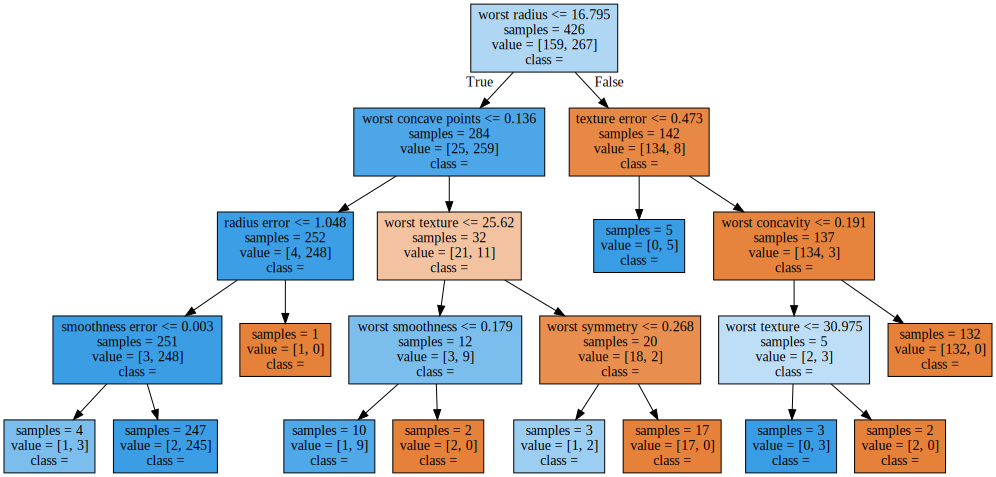

In [68]:
import graphviz

with open("data/tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [69]:
# 이미지로 출력

dot = graphviz.Source(dot_graph)
dot.format = "png"
dot.render(filename="data/tree")

'data\\tree.png.png'

In [71]:
# 특성 중요도

dir(tree)
print(tree.feature_importances_)

[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


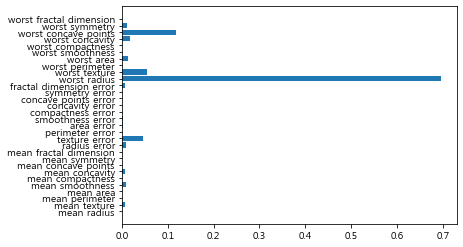

In [73]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

plot_feature_importances_cancer(tree)

In [75]:
# extrapolation(외부 삽입): 훈련 데이터 범위 박의 포인트에 대해서는 예측x

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
    #> path.join() 여러 개의 경로를 하나로 합침
ram_prices.head()

,Unnamed: 0,date,price
0,0,1957.0,411041792.0
1,1,1959.0,67947725.0
2,2,1960.0,5242880.0
3,3,1965.0,2642412.0
4,4,1970.0,734003.0


Text(0, 0.5, '가격($/Mbyte)')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


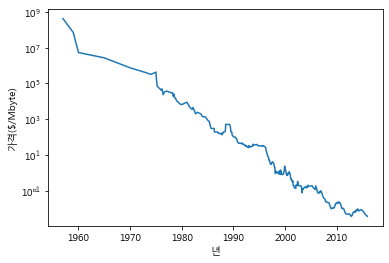

In [78]:
plt.semilogy(ram_prices.date, ram_prices.price)

plt.xlabel("년")
plt.ylabel("가격($/Mbyte)")

In [79]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만든다
data_train = ram_prices[ram_prices.date<2000]
data_test = ram_prices[ram_prices.date>=2000]

In [82]:
# 가격 예측 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]  #> 2차원 데이터로 만들기 위해 np.sewaxis 통해 2차원으로
X_train

# 데이터와 타겟 관계 간단히 하기 위해 로그 스케일로 변경
y_train = np.log(data_train.price)
y_train

0      19.834205
1      18.034249
2      15.472382
3      14.787203
4      13.506268
5      12.897619
6      12.658971
7      12.952495
8      12.101956
9      11.121127
10     10.818177
11     10.614082
12     10.798759
13     10.044987
14     10.373491
15     10.513253
16     10.239960
17     10.290110
18      9.862666
19     10.085809
20      9.680344
21      9.629051
22      9.261794
23      8.810460
24      8.776476
25      9.082507
26      8.407155
27      8.166216
28      8.403801
29      7.590852
         ...    
172     1.098612
173     1.098612
174     1.305626
175     1.386294
176     1.418277
177     1.289233
178     1.226712
179     1.178655
180     0.770108
181     0.770108
182    -0.094311
183    -0.030459
184     0.198851
185     0.173953
186    -0.030459
187     0.029559
188    -0.030459
189     0.148420
190    -0.174353
191    -0.174353
192     0.364643
193    -0.174353
194     0.223144
195     0.223144
196    -0.150823
197    -0.248461
198    -0.139262
199     0.0392

In [83]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear = LinearRegression().fit(X_train, y_train)

In [84]:
# 전체 기간에 대해서 예측 수행
X_all = ram_prices.date[:, np.newaxis]

In [85]:
pred_tree = tree.predict(X_all)
pred_linear = linear.predict(X_all)

In [86]:
# 예측한 값의 로그 스케일 되돌린다
price_tree = np.exp(pred_tree)
price_linear = np.exp(pred_linear)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


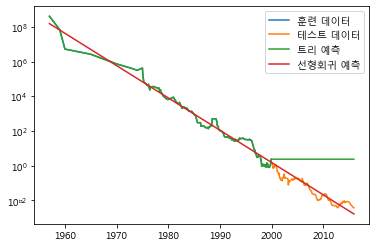

In [87]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_linear, label="선형회귀 예측")
plt.legend()
    #> 트리는 훈련데이터와 동일, 선형은 약간의 오차 감수(최소제곱법). 트리는 예측을 못함
    #> 트리는 시계열 데이터 분석에 부적합

## 사례1. iris 데이터 사용

In [88]:
from sklearn import datasets

In [91]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)

df.columns = iris.feature_names
df["result"] = iris.target

In [92]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),result
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [119]:
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# from sklearn.preprocessing import StandardScaler  #> 과소적합 확인 위해 스케일 조정(표준화)
# sc = StandardScaler().fit(X_train, y_train)

# X_train_std = sc.transform(X_train)
# X_test_std = sc.transform(X_test)

In [120]:
model = DecisionTreeClassifier(random_state=0, criterion="entropy", max_depth=3).fit(X_train, y_train)

In [121]:
print("훈련 정확도: ", model.score(X_train, y_train)) 
print("테스트 정확도: ", model.score(X_test, y_test))  

훈련 정확도:  0.9821428571428571
테스트 정확도:  0.9736842105263158


In [126]:
#!pip install pydotplus

  Stored in directory: C:\Users\acorn\AppData\Local\pip\Cache\wheels\35\7b\ab\66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus


In [127]:
import pydotplus
from IPython.display import Image

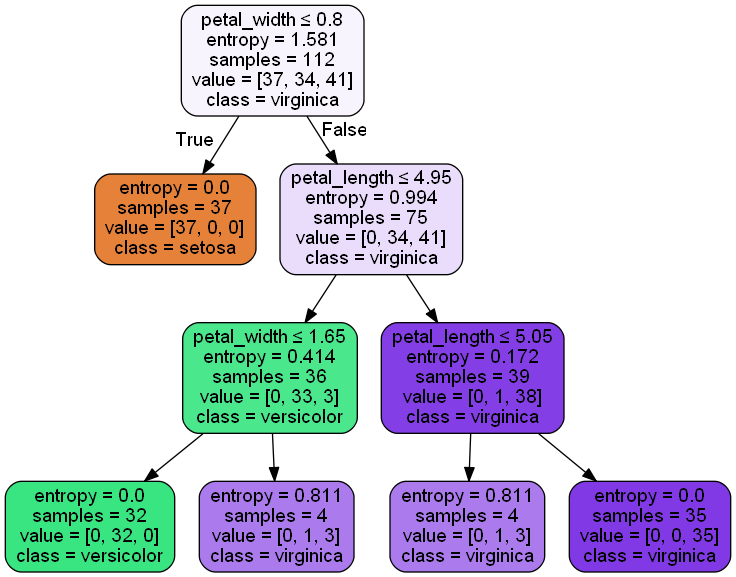

In [128]:
os.environ["PATH"] += os.pathsep + "C:/Program Files (x86)/Graphviz2.38/bin"
dot_data = export_graphviz(model, out_file=None, feature_names=["petal_length", "petal_width"], \
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

## 사례2. Sㅓ울 지역을 동별 분류 

In [129]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

In [131]:
train_df = pd.DataFrame(district_dict_list)
train_df

# 컬럼 순서 변경
train_df = train_df[["district", "latitude", "longitude", "label"]]
train_df

,district,latitude,longitude,label
0,Gangseo-gu,37.551000,126.849500,Gangseo
1,Yangcheon-gu,37.524240,126.855396,Gangseo
2,Guro-gu,37.495400,126.887400,Gangseo
3,Geumcheon-gu,37.451900,126.902000,Gangseo
4,Mapo-gu,37.560229,126.908728,Gangseo
5,Gwanak-gu,37.487517,126.915065,Gangnam
6,Dongjak-gu,37.512400,126.939300,Gangnam
7,Seocho-gu,37.483700,127.032400,Gangnam
8,Gangnam-gu,37.517200,127.047300,Gangnam
9,Songpa-gu,37.503510,127.117898,Gangnam


In [132]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

In [135]:
test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[["dong", "latitude", "longitude", "label"]]
test_df

,dong,latitude,longitude,label
0,Gaebong-dong,37.489853,126.854547,Gangseo
1,Gochuk-dong,37.501394,126.859245,Gangseo
2,Hwagok-dong,37.537759,126.847951,Gangseo
3,Banghwa-dong,37.575817,126.815719,Gangseo
4,Sangam-dong,37.577039,126.891620,Gangseo
5,Nonhyun-dong,37.508838,127.030720,Gangnam
6,Daechi-dong,37.501163,127.057193,Gangnam
7,Seocho-dong,37.486401,127.018281,Gangnam
8,Bangbae-dong,37.483279,126.988194,Gangnam
9,Dogok-dong,37.492896,127.043159,Gangnam


In [136]:
train_df.label.value_counts()

Gangdong    5
Gangseo     5
Gangnam     5
Gangbuk     5
Name: label, dtype: int64

In [137]:
test_df.label.value_counts()

Gangdong    5
Gangseo     5
Gangnam     5
Gangbuk     5
Name: label, dtype: int64

In [138]:
train_df.describe()

,latitude,longitude
count,20.000000,20.000000
mean,37.547909,126.999772
std,0.055086,0.089387
min,37.451900,126.849500
25%,37.510177,126.913481
50%,37.552597,127.028844
75%,37.573690,127.056458
max,37.668800,127.151405


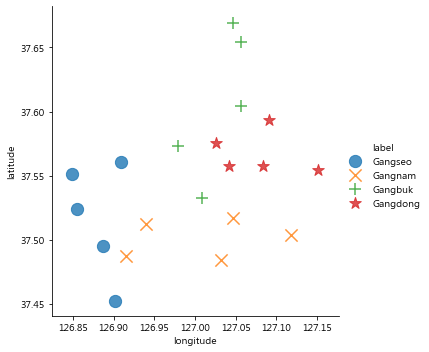

In [140]:
sns.lmplot("longitude", "latitude", data=train_df, markers=["o", "x", "+", "*"], hue="label", fit_reg=False, scatter_kws={"s":150})

In [141]:
# 구 이름과 동 이름 삭제

train_df.drop(["district"], axis=1, inplace=True)
test_df.drop(["dong"], axis=1, inplace=True)

In [144]:
X_train = train_df[["longitude", "latitude"]]
y_train = train_df["label"]

X_test = test_df[["longitude", "latitude"]]
y_test = test_df["label"]

In [145]:
def display_decision_surface(clf, X, y):
    x_min = X.longitude.min() - 0.01
    x_max = X.longitude.max() + 0.01
    y_min = X.latitude.min() - 0.01
    y_max = X.latitude.max() + 0.01
    
    n_classes = len(le.classes_)
    plot_colors = "rywb"
    plot_step = 0.001
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude, c=color, label=le.classes_[i], cmap=plt.cm.RdYlBu, \
                   edgecolor="black", s=200)
    
    plt.title("Decision surface of a dicision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=14)
    plt.xlabel("longitude", fontsize=16)
    plt.ylabel("latitude", fontsize=16)
    plt.show()

In [151]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_encode = le.fit_transform(y_train)
y_encode

clf = DecisionTreeClassifier(random_state=35).fit(X_train, y_encode)

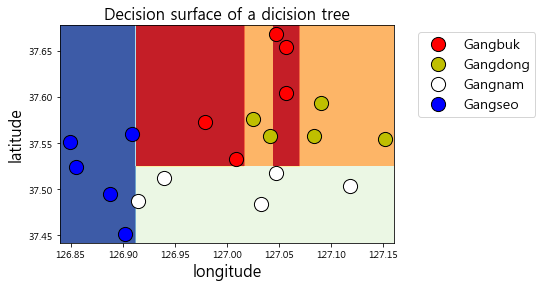

In [152]:
display_decision_surface(clf, X_train, y_encode)

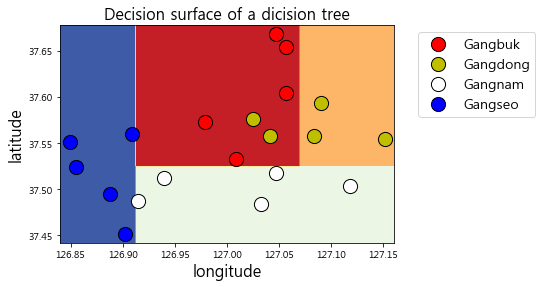

In [153]:
# max_depth 외에 가지치기 옵션
# min_samples_split 자식노드 갖기 위한 최소한의 데이터 개수
# min_samples_leaf 맨 마지막 노드(단말노드)의 최소 데이터 개수

clf = DecisionTreeClassifier(random_state=35, max_depth=4, min_samples_split=2, min_samples_leaf=2).fit(X_train, y_encode) 
display_decision_surface(clf, X_train, y_encode)

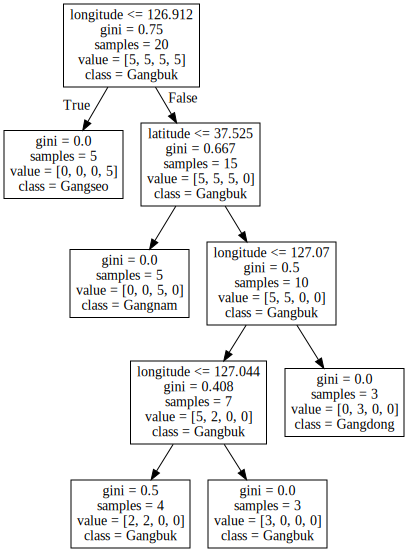

In [158]:
dot_data = export_graphviz(clf, out_file=None, feature_names=["longitude", "latitude"], \
                          class_names=["Gangbuk", "Gangdong", "Gangnam", "Gangseo"])

graph = graphviz.Source(dot_data)
graph.render("seoul")
graph

In [156]:
from sklearn.metrics import accuracy_score

pred = clf.predict(X_test)
print("정확도: ", accuracy_score(y_test.values, le.classes_[pred]))

정확도:  1.0


In [159]:
le.classes_  #> 숫자로 분류하여 모아놓은 변수들

array(['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'], dtype=object)

# Random Forest

    1) 의사결정나무에서 파생
    
    2) 특징
        + 데이터 스케일이나 데이터 형식(이진 or 연속적인 특성)에 영향을 받지 않는다
        
        + 의사결정나무와 달리 여러 질문을 통해 시작(질문 random 하게 선택)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
X, y = datasets.make_moons(n_samples=100, noise=0.25, random_state=42)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [166]:
forest = RandomForestClassifier(n_estimators=5, random_state=2).fit(X_train, y_train)
forest

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

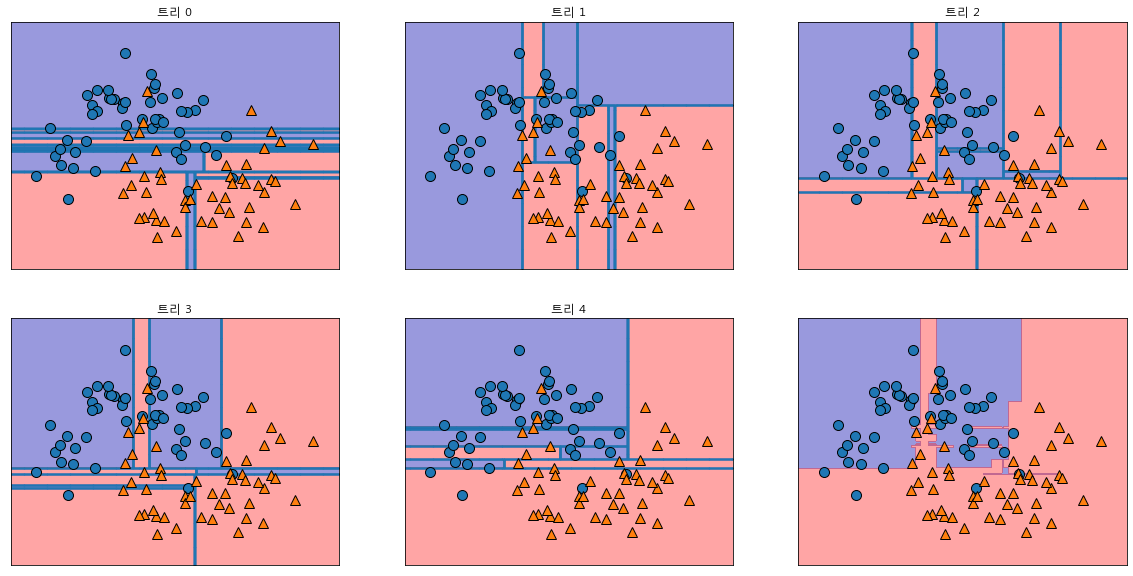

In [167]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("트리 {}".format(i))
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1, -1], alpha=.4)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [168]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
tree = RandomForestClassifier(random_state=0, n_estimators=100).fit(X_train, y_train)

print("훈련 세트 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972


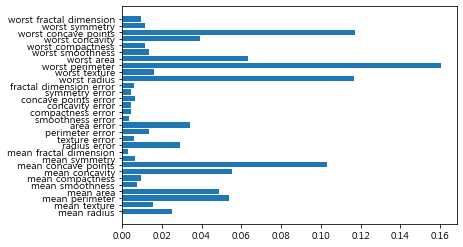

In [171]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

plot_feature_importances_cancer(tree)

In [6]:
### 손글씨 예제: 사람이 입력한 숫자 구분(이미지 트레이닝)
# DecisionTree vs RandomForest 성능 차이 확인(교차 검증)

from sklearn import datasets
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score  #> 교차검증

In [13]:
# 데이터 준비

mnist = datasets.load_digits()  #> 손글씨 이미지 샘플
features, labels = mnist.data, mnist.target

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [14]:
# 교차 검증 공용 함수

def cross_validation(classifier, features, labels):  #> (알고리즘, X, y). 두 알고리즘 한번에 확인 위해 함수 작성
    cv_scores = []
    
    for i in range(10):
        scores = cross_val_score(classifier, features, labels, cv=10, scoring="accuracy")  #> (cv=몇 등분, scoring=기준-정확도)
        cv_scores.append(scores.mean())
        
    return cv_scores

In [15]:
# 적합도 검증(DecisionTree)

df_cv_scores = cross_validation(tree.DecisionTreeClassifier(), features, labels)
rf_cv_scores = cross_validation(RandomForestClassifier(), features, labels)

In [16]:
# 성능 차이 시각화

cv_list = [["random_forest", rf_cv_scores], ["decision_tree", df_cv_scores]]
df = pd.DataFrame.from_items(cv_list)
df.head()

,random_forest,decision_tree
0,0.919924,0.832082
1,0.919903,0.818002
2,0.925383,0.828727
3,0.920542,0.832538
4,0.926024,0.823687


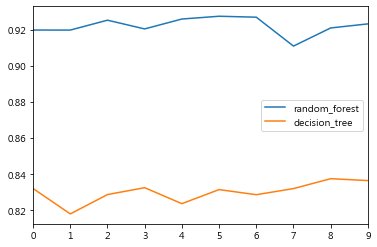

In [17]:
df.plot()

In [18]:
# 정확도 수치로 확인

print(np.mean(df_cv_scores))
print(np.mean(rf_cv_scores))

0.8301211782183069
0.9221824842259426


### 활용 예제

In [21]:
### 독버섯 구분
# 데이터셋 준비

import urllib.request as req  #> 인터넷 통해 직접 데이터 다운받을 수 있도록
saveDir = "C:/Users/acorn/hghbigdata/pythonwork/Machine_learning/data/mushroom.csv"  #> 다운받을 장소+파일명
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"  #> 데이터셋
req.urlretrieve(url, saveDir)
print("다운로드 완료")

다운로드 완료


In [32]:
mr = pd.read_csv("data/mushroom.csv", header=None)
mr.head()

"""
p = 먹을 수 있는 버섯
e = 먹을 수 없는 버섯

그 외 컬럼: 먹을 수 있는/없는 구분 위한 특성
"""

'\np = 먹을 수 있는 버섯\ne = 먹을 수 없는 버섯\n\n그 외 컬럼: 먹을 수 있는/없는 구분 위한 특성\n'

In [33]:
# 데이터값을 숫자형으로 변환: 데이터값이 알파벳 하나이므로 ASCII 코드로 변환 가능
# 데이터값이 단어일 경우에는 값의 카테고리화 필요(afd = 의미 없는 숫자로)

label = []
data = []

# for i in mr.iterrows():  #> 연속적으로 한 행의 값 가져오는 함수(인덱스도 같이 가져온다)
#    print(i)

for row_index, row in mr.iterrows():
    label.append(row.loc[0])  #> 정답만 추출
    
    row_data = []
    for v in row.loc[1:]:  #> 정답 제외한 나머지 특성들
        row_data.append(ord(v))  #> ord() 문자를 ASCII 코드로 전환
        
    data.append(row_data)
    
data

[[120,
  115,
  110,
  116,
  112,
  102,
  99,
  110,
  107,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  121,
  116,
  97,
  102,
  99,
  98,
  107,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  103],
 [98,
  115,
  119,
  116,
  108,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  110,
  110,
  109],
 [120,
  121,
  119,
  116,
  112,
  102,
  99,
  110,
  110,
  101,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  115,
  117],
 [120,
  115,
  103,
  102,
  110,
  102,
  119,
  98,
  107,
  116,
  101,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  101,
  110,
  97,
  103],
 [120,
  121,
  121,
  116,
  97,
  102,
  99,
  98,
  110,
  101,
  99,
  115,
  115,
  119,
  119,
  112,
  119,
  111,
  112,
  107,
  110,
  103],
 [98,
  115,
  119,
  116,
  97,
  102,
  99,
  98,
  103,
  101,
  99,
  115,
  115,


In [34]:
# 훈련용 데이터와 테스트용 데이터 구분

data_train, data_test, label_train, label_test = train_test_split(data, label)

In [35]:
# 훈련 후 정답률 비교

clf = RandomForestClassifier().fit(data_train, label_train)

In [36]:
pred = clf.predict(data_test)

In [37]:
from sklearn.metrics import accuracy_score, classification_report

print("정답률: ", accuracy_score(label_test, pred))  #> 실제 정답과 예측값 비교 후 비율로 나타냄
print("레포트: ", classification_report(label_test, pred))

정답률:  1.0
레포트:                precision    recall  f1-score   support

           e       1.00      1.00      1.00      1032
           p       1.00      1.00      1.00       999

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [39]:
# 결측치 확인
mr.isnull().mean()

# 전체 요약
mr.describe()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [40]:
# 데이터와 레이블 분리

X = mr.drop(0, axis=1)
y = mr[0]

In [42]:
X.head()
y.head()

0    p
1    e
2    e
3    p
4    e
Name: 0, dtype: object

In [45]:
# 전용 API 함수 이용한 방법(데이터값을 의미 없는 숫자로 카테고리화)

from sklearn.preprocessing import LabelEncoder

encoder_X = LabelEncoder()
for col in X.columns:
    X[col] = encoder_X.fit_transform(X[col])
    
X.head()

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [47]:
encoder_y = LabelEncoder()
y = encoder_y.fit_transform(y)

y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [48]:
X = pd.get_dummies(X, columns=X.columns, drop_first=True)  #> get_dummies() 통해 숫자가 의미 가질 수 없도록 범주화
X.head()

,1_1,1_2,1_3,1_4,1_5,2_1,2_2,2_3,3_1,3_2,...,21_2,21_3,21_4,21_5,22_1,22_2,22_3,22_4,22_5,22_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  #> test_size=테스트 데이터 개수 설정(30%)

In [53]:
# 공통 함수

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def print_score(classifier,X_train,y_train,X_test,y_test,train=True): 
    if train == True:   #> train=True 면 점수 확인을 훈련용으로
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:  #> train=False 면 점수 확인을 테스트용으로
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

In [54]:
# 랜덤포레스트 적용

classifier = RandomForestClassifier(n_estimators=50, criterion="entropy", random_state=42)  #> criterion=사용할 알고리즘
classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test, train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000


In [55]:
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]



In [56]:
# 의사결정나무 적용

from sklearn.tree import DecisionTreeClassifier as DT

classifier = DT(criterion="entropy", random_state=42)  #> criterion=사용할 알고리즘
classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test, train=True)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	0.9996

Standard Deviation:	0.0011


In [57]:
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]



In [58]:
# KNN 적용

from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN().fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print("------------------------")
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Training results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   0 2735]]

Average Accuracy:	1.0000

Standard Deviation:	0.0000
------------------------
Test results:

Accuracy Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   0 1181]]



In [60]:
# 로지스틱 적용

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

print_score(classifier, X_train, y_train, X_test, y_test, train=True)
print("------------------------")
print_score(classifier, X_train, y_train, X_test, y_test, train=False)

Training results:

Accuracy Score: 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2951
           1       1.00      1.00      1.00      2735

    accuracy                           1.00      5686
   macro avg       1.00      1.00      1.00      5686
weighted avg       1.00      1.00      1.00      5686


Confusion Matrix:
[[2951    0]
 [   2 2733]]

Average Accuracy:	0.9993

Standard Deviation:	0.0014
------------------------
Test results:

Accuracy Score: 0.9992

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


Confusion Matrix:
[[1257    0]
 [   2 1179]]



# Gradient Boosting Regression Tree

    1) 의사결정나무의 파생
    
    2) RandomForest 약점 보완. 더 빠른 속도의 알고리즘
        + RandomForest의 무작위 질문 생성으로 인한 중복 문제 보완(오차 보완: 경사 하강법)
        
        + 회귀와 분류에서 모두 사용 가능
        
        + 강력한 가지치기 스스로 실행(보통 최대 5개 깊이로 생성)
        
        + RandomForest보다 매개변수 설정에 조금 더 민감하나 잘 조정하면 더 높은 정확도 제공
    
        + learning_rate(경사 하강법) 사용하여 오차 보정

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

In [63]:
tree = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)

In [64]:
print("훈련 셋: ", tree.score(X_train, y_train))  #> 과적합
print("테스트 셋: ", tree.score(X_test, y_test))

훈련 셋:  1.0
테스트 셋:  0.958041958041958


In [67]:
# 최대 가지 깊이로 과적합 조율

gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)  #> 가지치기(깊이 조절)
gbrt.fit(X_train, y_train)

print("훈련 셋: ", gbrt.score(X_train, y_train))
print("테스트 셋: ", gbrt.score(X_test, y_test))

훈련 셋:  0.9906103286384976
테스트 셋:  0.965034965034965


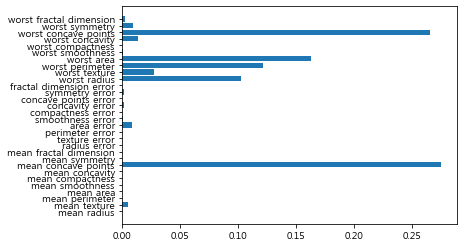

In [68]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    

plot_feature_importances_cancer(gbrt)  #> 변수 선별

In [66]:
# 경사 하강법(learning_rate)으로 과적합 조율

gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("훈련 셋: ", gbrt.score(X_train, y_train))
print("테스트 셋: ", gbrt.score(X_test, y_test))

훈련 셋:  0.9929577464788732
테스트 셋:  0.958041958041958
